In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv("autos.csv")

df.head()

index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  ...  \
0   Angebot    480   test         NaN                1993    manuell  ...   
1   Angebot  18300   test       coupe                2011    manuell  ...   
2   Angebot   9800   test         suv                2004  automatik  ...   
3   Angebot   1500   test  kleinwagen                2001    manuell  ...   
4   Angebot   3600   test  kleinwagen                2008    manuell  ...   

   model kilometer  monthOfRegistration  fuelType       brand  \
0   golf    150000                    0    benzin  volkswagen   
1    NaN    125000                    5    diesel        audi   
2  grand    125000                    8    diesel        jeep   
3   golf    150000                    6    benzin  volkswagen   
4  fabia     90000                    7    diesel       skoda   

  notRepairedDamage          dateCreated nrOfPictures  postalCode  \
0               NaN  2016-03-24 00:00:00            0       70435   
1                ja  2016-03-24 00:00:00            0       66954   
2               NaN  2016-03-14 00:00:00            0       90480   
3              nein  2016-03-17 00:00:00            0       91074   
4              nein  2016-03-31 00:00:00            0       60437   

              lastSeen  
0  2016-04-07 03:16:57  
1  2016-04-07 01:46:50  
2  2016-04-05 12:47:46  
3  2016-03-17 17:40:17  
4  2016-04-06 10:17:21  

[5 rows x 21 columns]

In [162]:
df.describe()

index         price  yearOfRegistration        powerPS  \
count  371528.000000  3.715280e+05       371528.000000  371528.000000   
mean   185763.500000  1.729514e+04         2004.577997     115.549477   
std    107251.039743  3.587954e+06           92.866598     192.139578   
min         0.000000  0.000000e+00         1000.000000       0.000000   
25%     92881.750000  1.150000e+03         1999.000000      70.000000   
50%    185763.500000  2.950000e+03         2003.000000     105.000000   
75%    278645.250000  7.200000e+03         2008.000000     150.000000   
max    371527.000000  2.147484e+09         9999.000000   20000.000000   

           kilometer  monthOfRegistration  nrOfPictures    postalCode  
count  371528.000000        371528.000000      371528.0  371528.00000  
mean   125618.688228             5.734445           0.0   50820.66764  
std     40112.337051             3.712412           0.0   25799.08247  
min      5000.000000             0.000000           0.0    1067.00000  
25%    125000.000000             3.000000           0.0   30459.00000  
50%    150000.000000             6.000000           0.0   49610.00000  
75%    150000.000000             9.000000           0.0   71546.00000  
max    150000.000000            12.000000           0.0   99998.00000

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [164]:
df["price"].value_counts().sort_index(ascending=True).head(15)

0     10778
1      1189
2        12
3         8
4         1
5        26
7         3
8         9
9         8
10       84
11        5
12        8
13        7
14        5
15       27
Name: price, dtype: int64

In [165]:
df["price"].value_counts().sort_index(ascending=False).head(15)

2147483647     1
99999999      15
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       9
11111111      10
10010011       1
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
Name: price, dtype: int64

In [166]:
avg_price_by_brand = {}

brands = df["brand"].value_counts().index[:11]


In [167]:
for i in brands:
    rows = df[df["brand"] == i]
    mean = rows["price"].mean()
    avg_price_by_brand[i] = mean

In [168]:
brand_series = pd.Series(avg_price_by_brand)
brand_series

volkswagen       14533.496007
bmw              14844.144883
opel              3223.522449
mercedes_benz    17244.060438
audi             15868.514221
ford              8462.054706
renault           2334.258946
peugeot           3166.981591
fiat              5326.312836
seat              4356.666050
mazda             5680.361194
dtype: float64

In [169]:
#drop index dateCrawled name seller offerType abtest monthOfRegistration dateCreated nrOfPictures postalCode lastSeen

df.drop(['index','dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'], axis=1, inplace=True)

df.head()

price vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480         NaN                1993    manuell        0   golf   
1  18300       coupe                2011    manuell      190    NaN   
2   9800         suv                2004  automatik      163  grand   
3   1500  kleinwagen                2001    manuell       75   golf   
4   3600  kleinwagen                2008    manuell       69  fabia   

   kilometer fuelType       brand notRepairedDamage  
0     150000   benzin  volkswagen               NaN  
1     125000   diesel        audi                ja  
2     125000   diesel        jeep               NaN  
3     150000   benzin  volkswagen              nein  
4      90000   diesel       skoda              nein

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               371528 non-null  int64 
 1   vehicleType         333659 non-null  object
 2   yearOfRegistration  371528 non-null  int64 
 3   gearbox             351319 non-null  object
 4   powerPS             371528 non-null  int64 
 5   model               351044 non-null  object
 6   kilometer           371528 non-null  int64 
 7   fuelType            338142 non-null  object
 8   brand               371528 non-null  object
 9   notRepairedDamage   299468 non-null  object
dtypes: int64(4), object(6)
memory usage: 28.3+ MB


In [171]:
#drop rows with missing values

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260956 entries, 3 to 371527
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               260956 non-null  int64 
 1   vehicleType         260956 non-null  object
 2   yearOfRegistration  260956 non-null  int64 
 3   gearbox             260956 non-null  object
 4   powerPS             260956 non-null  int64 
 5   model               260956 non-null  object
 6   kilometer           260956 non-null  int64 
 7   fuelType            260956 non-null  object
 8   brand               260956 non-null  object
 9   notRepairedDamage   260956 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.9+ MB


In [172]:
#drop rows with price = 0

df = df[df['price'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257567 entries, 3 to 371527
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               257567 non-null  int64 
 1   vehicleType         257567 non-null  object
 2   yearOfRegistration  257567 non-null  int64 
 3   gearbox             257567 non-null  object
 4   powerPS             257567 non-null  int64 
 5   model               257567 non-null  object
 6   kilometer           257567 non-null  int64 
 7   fuelType            257567 non-null  object
 8   brand               257567 non-null  object
 9   notRepairedDamage   257567 non-null  object
dtypes: int64(4), object(6)
memory usage: 21.6+ MB


In [173]:
df.isnull().sum()

price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [174]:
from sklearn.preprocessing import LabelEncoder

# Combine all categorical columns into a single series
categorical_columns = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
combined_categories = df[categorical_columns].stack().astype(str)

# Apply label encoding to the combined series
label_encoder = LabelEncoder()
encoded_categories = label_encoder.fit_transform(combined_categories)

# Replace the original categorical columns with the encoded values
idx = 0
for column in categorical_columns:
    unique_categories = df[column].nunique()
    df[column + '_encoded'] = encoded_categories[idx:idx+len(df)]
    idx += len(df)

# Drop the original categorical columns if desired
df.drop(categorical_columns, axis=1, inplace=True)



# You can repeat this process for other categorical columns as well


# df = pd.get_dummies(df, columns=['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage'])

df.head()

price  yearOfRegistration  powerPS  kilometer  vehicleType_encoded  \
3    1500                2001       75     150000                  163   
4    3600                2008       69      90000                  182   
5     650                1995      102     150000                  137   
6    2200                2004      109     150000                   54   
10   2000                2004      105     150000                  293   

    gearbox_encoded  model_encoded  fuelType_encoded  brand_encoded  \
3               200            293               107             10   
4               164            147               293             54   
5               182            163               200            213   
6                10            182               174            200   
10               54             86               182            164   

    notRepairedDamage_encoded  
3                         182  
4                          50  
5                          54  
6                         275  
10                        200

In [175]:
#remove outliers of all the variables price	yearOfRegistration	powerPS	kilometer	vehicleType_encoded	gearbox_encoded	model_encoded	fuelType_encoded	brand_encoded	notRepairedDamage_encoded

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

threshold = 3

print(np.where(z > 3))

df = df[(z < 3).all(axis=1)]

df.info()

           price  yearOfRegistration   powerPS  kilometer  \
3       0.019726            0.364458  0.360058   0.653816   
4       0.013649            0.714279  0.401970   0.851112   
5       0.022186            1.289089  0.171453   0.653816   
6       0.017701            0.097858  0.122555   0.653816   
10      0.018280            0.097858  0.150497   0.653816   
...          ...                 ...       ...        ...   
371520  0.014807            0.097858  0.687747   0.653816   
371521  0.020739            0.518563  0.883960   0.653816   
371524  0.020597            0.518563  0.178438   0.026762   
371525  0.002556            1.134984  0.171453   0.653816   
371527  0.059826            1.484805  1.351357   1.854398   

        vehicleType_encoded  gearbox_encoded  model_encoded  fuelType_encoded  \
3                  0.249729         0.753237       2.022208          0.511392   
4                  0.508691         0.262371       0.034125          2.021867   
5                  0.104

In [176]:
X = df.drop('price', axis=1)
X = X.drop('yearOfRegistration', axis=1)
y = df['price']

print(X.shape)
print(y.shape)

(254558, 8)
(254558,)


In [177]:
X.head()

powerPS  kilometer  vehicleType_encoded  gearbox_encoded  model_encoded  \
3        75     150000                  163              200            293   
4        69      90000                  182              164            147   
5       102     150000                  137              182            163   
6       109     150000                   54               10            182   
10      105     150000                  293               54             86   

    fuelType_encoded  brand_encoded  notRepairedDamage_encoded  
3                107             10                        182  
4                293             54                         50  
5                200            213                         54  
6                174            200                        275  
10               182            164                        200

In [178]:
#save y in new file
y.to_csv('price.csv', index=False)


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(203646, 8)

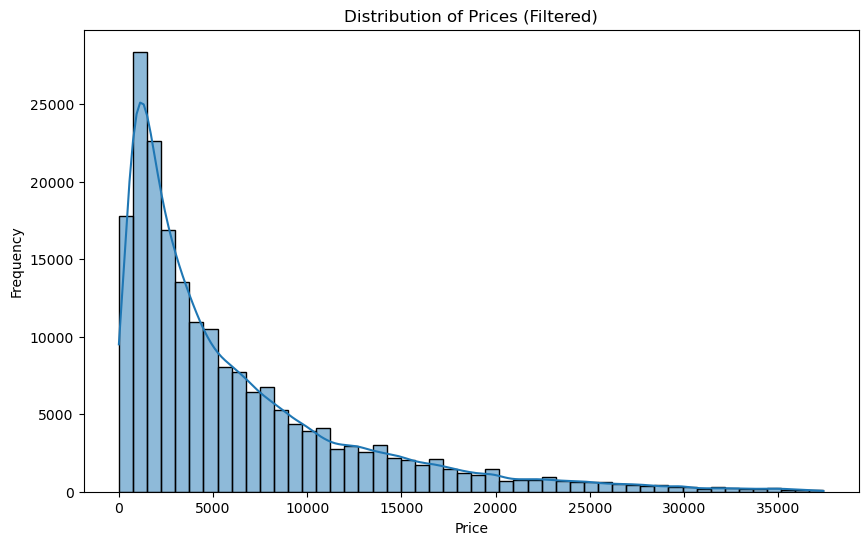

In [180]:
#show price bar to see how price destibuted
import numpy as np

threshold = np.percentile(y_train, 99)

# Filter out outliers
y_train_filtered = y_train[y_train < threshold]

# Adjust the bin width and number of bins
plt.figure(figsize=(10, 6))
sns.histplot(y_train_filtered, bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (Filtered)')
plt.show()



<Figure size 2000x2000 with 0 Axes>

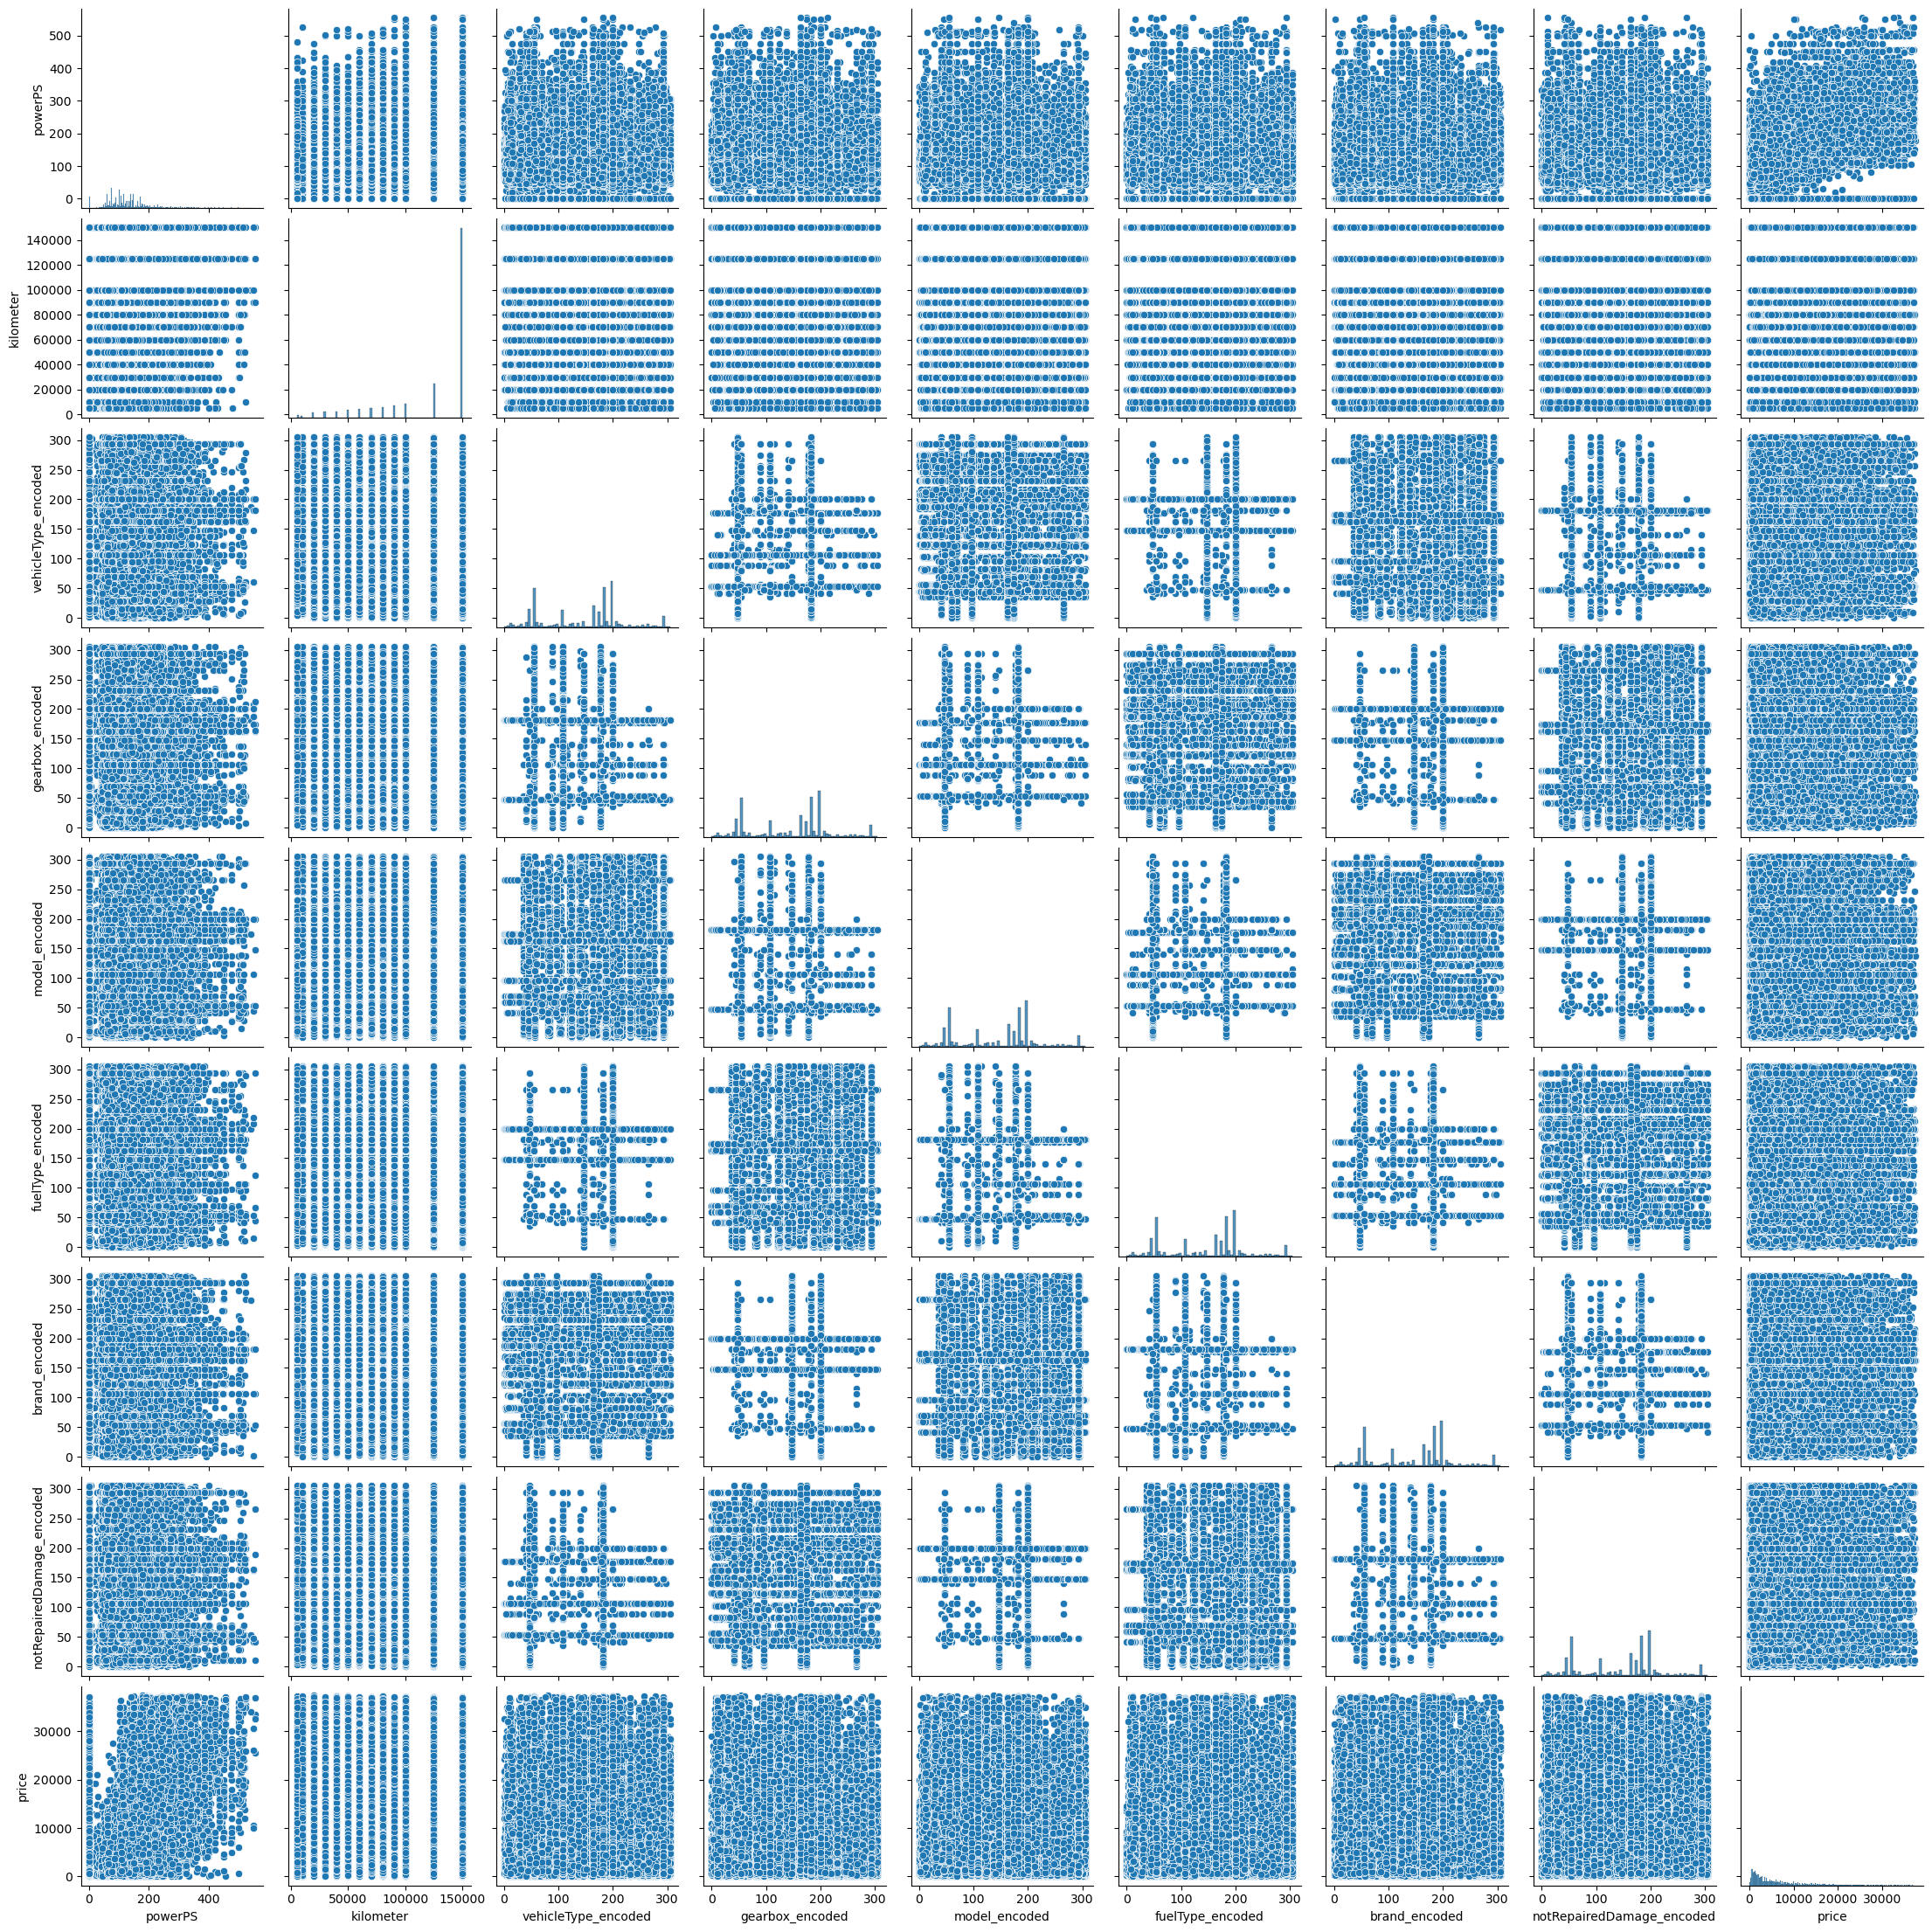

In [181]:
#show price by all the features remove the outlires

# Filter out outliers
X_train_filtered = X_train[y_train < threshold]
y_train_filtered = y_train[y_train < threshold]

# Create a pairplot
plt.figure(figsize=(20, 20))
sns.pairplot(pd.concat([X_train_filtered, y_train_filtered], axis=1))
plt.show()


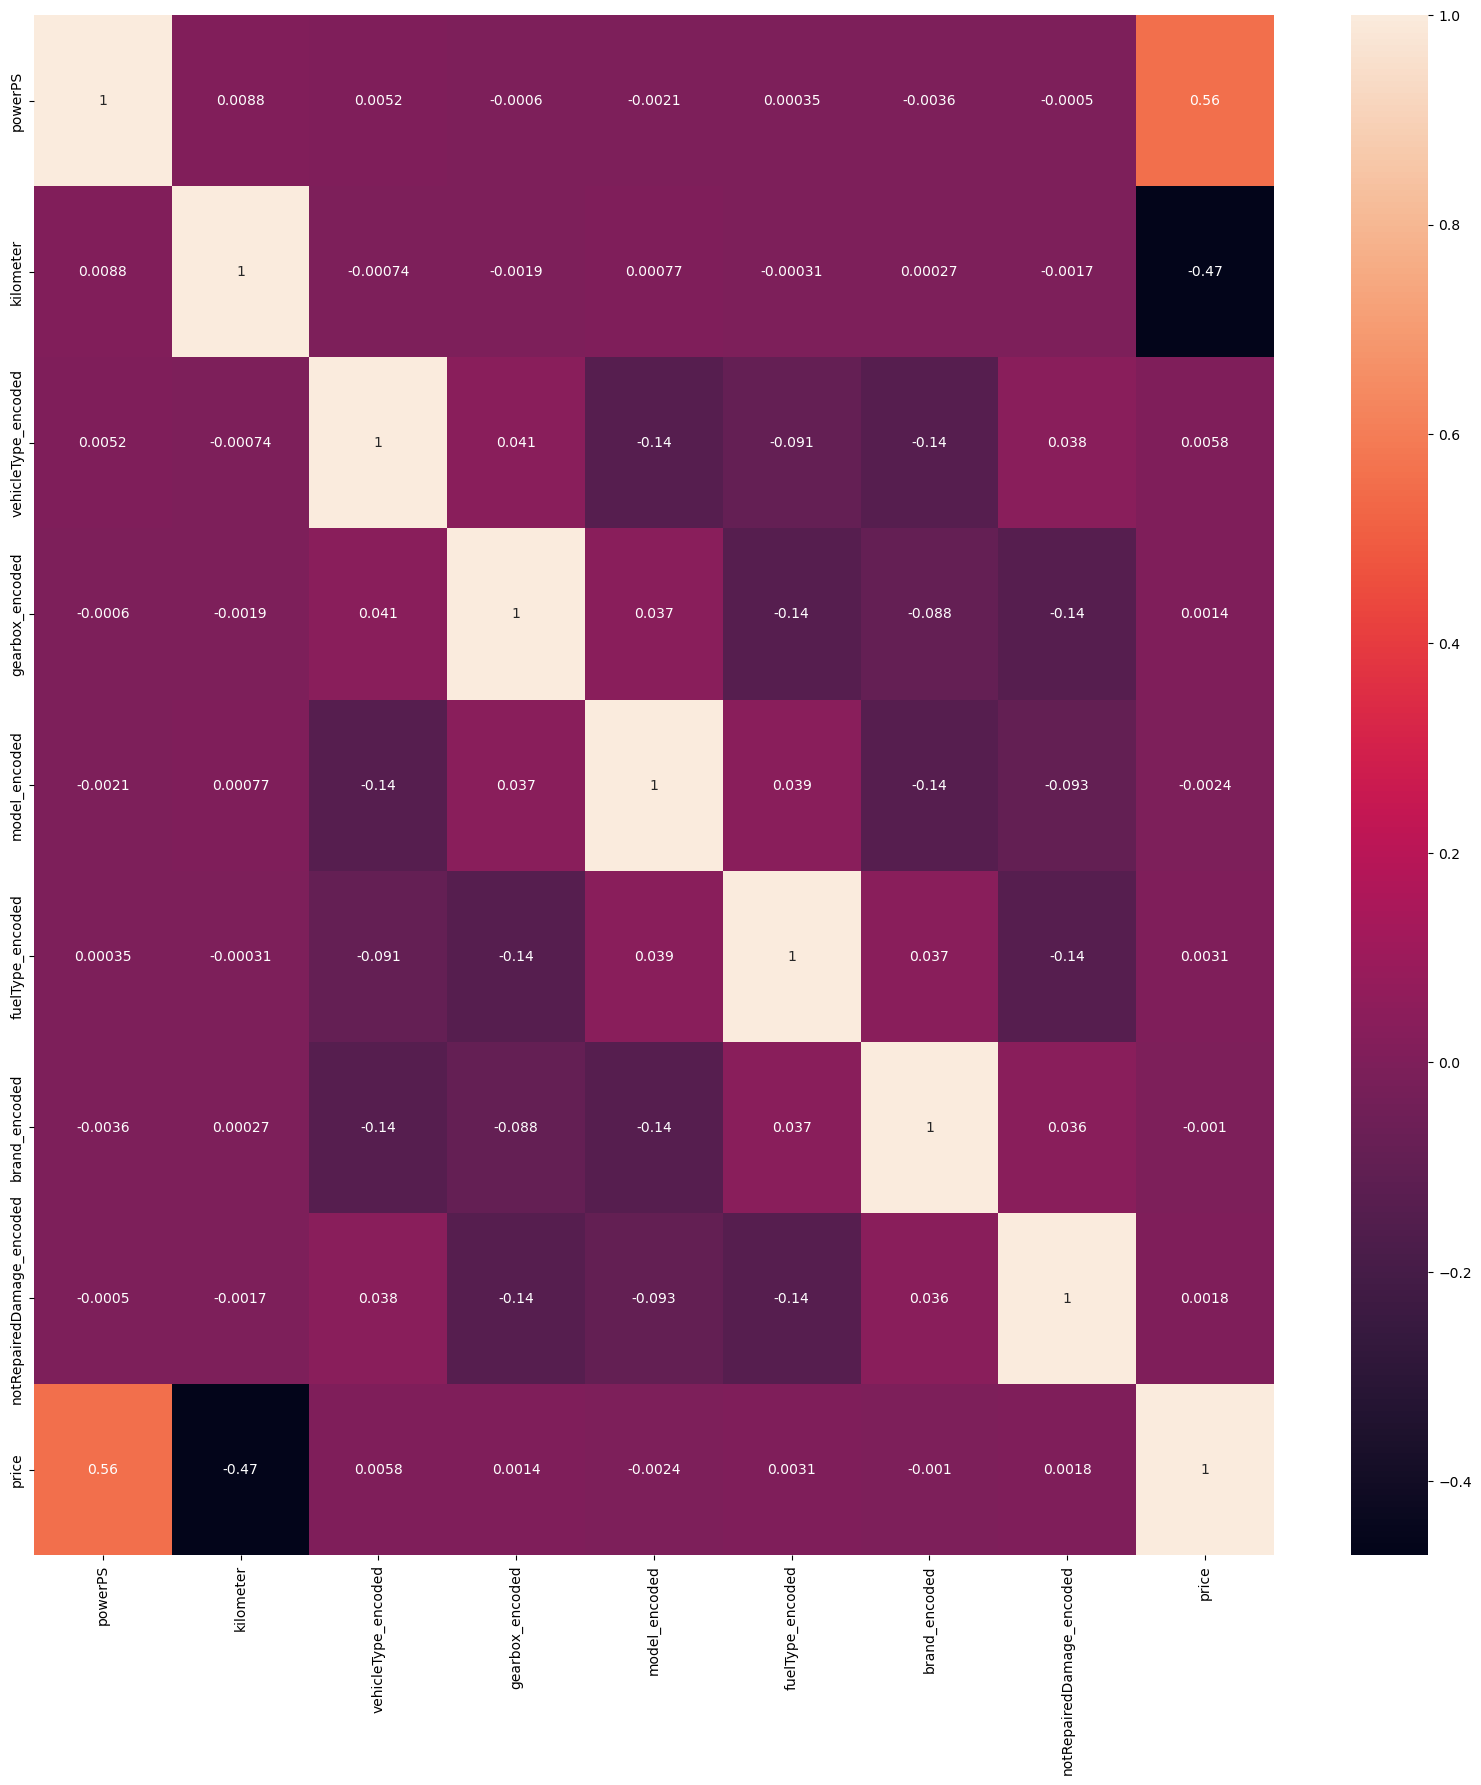

In [188]:
#check with plot if there is lenear regrassion between price and other features
plt.figure(figsize=(20, 20))
sns.heatmap(pd.concat([X_train_filtered, y_train_filtered], axis=1).corr(), annot=True)
plt.show()

In [227]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [228]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)
model.score(X_test, y_test)


127405890.95255427


0.23258427567823403

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

model.score(X_test, y_test)

111856296.15908633


0.32624559276586385

In [ ]:
# with linear regression score = 0.23 and with random forest score = 0.326
# random forest is better than linear regression
# i want to try with xgboost

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

model.score(X_test, y_test)

117777344.55572918


0.29058079257427727

In [ ]:
#try other model to make my model better
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

model.score(X_test, y_test)

109603190.57920039


0.33981693265944446

In [ ]:
#try other model to make my model better

from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

model.score(X_test, y_test)


130561753.74005559


0.21357527453375547

In [ ]:
# for all the models i used this one is the first GradientBoostingRegressor
# give me other model to make the score better

# i will try with catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100, random_state=42, logging_level='Silent')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

model.score(X_test, y_test)


112210928.49617557


0.324109502905336